In [1]:
import pandas as pd
import os

In [2]:
data_dir = '../../AI_perception_survey_data/WE'

### Taking a preliminary look

In [3]:
# getting all the files
all_files = os.listdir(data_dir)

In [4]:
# all the files in the directory
all_files

['~$Pollfish_Survey_%C3%96ffentliche_Wahrnehmung_der_k%C3%BCnstlichen_Intelligenz_%5BDeutsche%5D_1979903.xlsx',
 'Public Perception of Artificial Intelligence Technologies [UK].csv',
 'Public Perception of Artificial Intelligence Technologies [Deutsche].csv',
 'Pollfish_Survey_%C3%96ffentliche_Wahrnehmung_der_k%C3%BCnstlichen_Intelligenz_%5BDeutsche%5D_1979903.xlsx',
 'Public Perception of Artificial Intelligence Technologies [intl_Ver].csv',
 "Perception Publique des technologies de l'Intelligence Artificielle [FR].csv",
 'gm_all.csv',
 'Pollfish_Survey_Perception_Publique_des_technologies_de_l%27Intelligence_Artificielle_%5BFR%5D_1979900.xlsx']

## All the Google Form .csv files

Let's check uniformity in column names

In [6]:
# loading in all the google forms data
gm_uk = pd.read_csv(os.path.join(data_dir, all_files[1]))
gm_de = pd.read_csv(os.path.join(data_dir, all_files[2]))
gm_fr = pd.read_csv(os.path.join(data_dir, all_files[5]))
gm_intl = pd.read_csv(os.path.join(data_dir, all_files[4]))

# storing as a list of items
all_gm = [gm_uk, gm_de, gm_fr, gm_intl]

In [7]:
len(gm_uk.columns), len(gm_de.columns), len(gm_fr.columns), len(gm_intl.columns)

(32, 32, 31, 32)

The col fr is missing is a redundant question to the survey - AMT id aquisition

In [8]:
for i in range(31):
    print('******************', i, '******************')
    print(gm_uk.columns[i])
    print(gm_de.columns[i])
    print(gm_fr.columns[i])
    print(gm_intl.columns[i])
    print("--------------------------------------------")
    print(' ')

****************** 0 ******************
Timestamp
Timestamp
Timestamp
Timestamp
--------------------------------------------
 
****************** 1 ******************
How would you rate your personal knowledge of artificial intelligence technologies?
Wie beurteilen Sie Ihr persönliches Wissen über künstliche Intelligenz?
Comment évalueriez-vous votre connaissance personnelle des technologies d'intelligence artificielle ?
How would you rate your personal knowledge of artificial intelligence technologies?
--------------------------------------------
 
****************** 2 ******************
Which of the following statements are *false* regarding the nature or capabilities of artificial intelligence?
Welche der folgenden Aussagen sind * falsch * in Bezug auf die Eigenschaften oder die Möglichkeiten der künstlichen Intelligenz?
Parmi les affirmations suivantes, lesquelles sont * fausses * concernant la nature ou les capacités de l'intelligence artificielle ?
Which of the following statemen

We just inspected by hand, the column orders are consistent

In [9]:
# remove unwanted cols
gm_uk.drop([gm_uk.columns[0],gm_uk.columns[-1]], axis = 1, inplace = True)
gm_de.drop([gm_de.columns[0],gm_de.columns[-1]], axis = 1, inplace = True)
gm_fr.drop([gm_fr.columns[0]], axis = 1, inplace = True)
gm_intl.drop([gm_intl.columns[0],gm_intl.columns[-1]], axis = 1, inplace = True)

In [10]:
# we replace the column names in the same fashion as we did with the CN dataset
col_names = ['q{:02}'.format(i+1) for i in range(25)] + ['country_of_residence'] + ['q{:02}'.format(i) for i in range(26,30)]
# reorder them
col_orders = ['q{:02}'.format(i+1) for i in range(len(gm_uk.columns) - 1)] + ['country_of_residence']

In [11]:
# replacing them col names
for file in all_gm:
    file.columns = col_names

In [12]:
# changing col orders
gm_uk = gm_uk[col_orders]
gm_de = gm_de[col_orders]
gm_fr = gm_fr[col_orders]
gm_intl = gm_intl[col_orders]

### Checking nan

UK

In [13]:
gm_uk.isnull().sum()

q01                      0
q02                      0
q03                      0
q04                      0
q05                      0
q06                      0
q07                      0
q08                      0
q09                      0
q10                      0
q11                      0
q12                      0
q13                      0
q14                      0
q15                      1
q16                      0
q17                      0
q18                      0
q19                      0
q20                      0
q21                     19
q22                      0
q23                      0
q24                      0
q25                      0
q26                      0
q27                      0
q28                      0
q29                      0
country_of_residence    43
dtype: int64

Fr

In [14]:
gm_fr.isnull().sum()

q01                      0
q02                      0
q03                      0
q04                      0
q05                      0
q06                      0
q07                      0
q08                      0
q09                      0
q10                      0
q11                      0
q12                      0
q13                      0
q14                      0
q15                      0
q16                      0
q17                      0
q18                      0
q19                      0
q20                      0
q21                     19
q22                      0
q23                      0
q24                      0
q25                      0
q26                      0
q27                      0
q28                      0
q29                      0
country_of_residence     0
dtype: int64

De

In [15]:
gm_de.isnull().sum()

q01                     0
q02                     0
q03                     0
q04                     0
q05                     0
q06                     0
q07                     0
q08                     0
q09                     0
q10                     0
q11                     0
q12                     0
q13                     0
q14                     0
q15                     0
q16                     0
q17                     0
q18                     0
q19                     0
q20                     0
q21                     1
q22                     0
q23                     0
q24                     0
q25                     0
q26                     0
q27                     0
q28                     0
q29                     0
country_of_residence    0
dtype: int64

Intl

In [16]:
gm_intl.isnull().sum()

q01                     0
q02                     0
q03                     0
q04                     0
q05                     0
q06                     0
q07                     0
q08                     0
q09                     0
q10                     0
q11                     0
q12                     0
q13                     0
q14                     0
q15                     0
q16                     0
q17                     0
q18                     0
q19                     0
q20                     0
q21                     4
q22                     0
q23                     0
q24                     0
q25                     0
q26                     0
q27                     0
q28                     0
q29                     0
country_of_residence    0
dtype: int64

There are a few of NaNs to deal with, but nothing to violent, we'll leave them till we analyse the data

### Extracting answers, creating corresponding dict

In [17]:
# noting question numbers that need recoding

# multiple choice
q_num_mc = [2,10,11,14,15,18,19,21,24]
q_num_mc = ['q{:02}'.format(num) for num in q_num_mc]
# single choice
q_num_sc = [1,3,16,17,20,22,23,25,27,28]
q_num_sc = ['q{:02}'.format(num) for num in q_num_sc]
# all
q_num_all = q_num_mc + q_num_sc

In [18]:
# restoring as a list of items
all_gm = [gm_uk, gm_de, gm_fr, gm_intl]

In [19]:
# we gone done created a function to streamline this, see clean_functions.py
from clean_functions import recode_answers

# creating a list of lang variables
langs = ['en', 'de', 'fr', 'en']

# looping through all datasets
for i, dataset in enumerate(all_gm):
    # setting the right lang var
    lang = langs[i]
    
    # looping through all single choice questions
    for q_num in q_num_sc:
        # recode and replace
        dataset[q_num] = recode_answers(dataset, q_num, lang, False)
    
    # looping through all multiple choice questions
    for q_num in q_num_mc:
        # recode and replace
        dataset[q_num] = recode_answers(dataset, q_num, lang, True)

In [20]:
cols = ['q{:02}'.format(i+1) for i in range(20,30)]
indices = list(range(0,30))

Filling in the gaps for gm_uk country of residence

In [21]:
gm_uk.country_of_residence = ['UK' if isinstance(country, float) else country for country in gm_uk.country_of_residence]

# Concatenating and exporting

In [22]:
gm_all = pd.concat([gm_uk, gm_fr, gm_de, gm_intl]).reset_index(drop = True)

In [ ]:
gm_all.to_csv(os.path.join(data_dir, 'gm_all.csv'))

### some basic visualisation

In [24]:
from matplotlib import pyplot as plt


(array([ 2., 18., 36.,  0., 72., 31., 10.]),
 array([2.        , 2.71428571, 3.42857143, 4.14285714, 4.85714286,
        5.57142857, 6.28571429, 7.        ]),
 <a list of 7 Patch objects>)

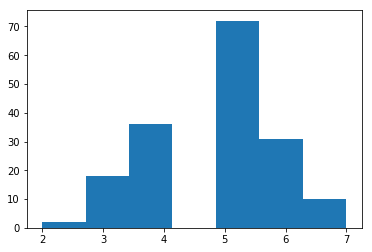

In [34]:
plt.hist(gm_all.q04, bins = 7)

(array([ 2., 14., 16., 11., 38., 51., 37.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

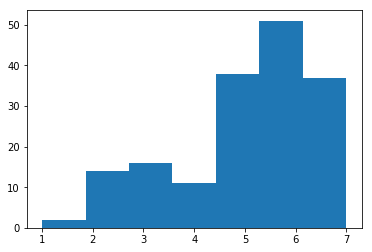

In [35]:
plt.hist(gm_all.q05, bins = 7)